# ТР 3

## Exercice 1: Decouvrire l'environnement

In [1]:
import numpy as np
from traffic_env import TrafficEnvironment
import numpy as np
import matplotlib.pyplot as plt

🚦 Initial Traffic Light Simulation 🚦
State Format: [Cars North, Cars South, Cars East, Cars West]
Actions: 0 = Keep Current Light, 1 = Switch Light
Initial state: [6 2 0 4] (NS Green, EW Red)
Step 1:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [2 1 2 6]
  🎯 Reward (Cars Passed): 5
----------------------------------------
Step 2:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [2 1 4 8]
  🎯 Reward (Cars Passed): 2
----------------------------------------
Step 3:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [1 1 5 9]
  🎯 Reward (Cars Passed): 2
----------------------------------------
Step 4:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [ 1  0  6 10]
  🎯 Reward (Cars Passed): 2
----------------------------------------
Step 5:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [ 2  1  8 12]
  🎯 Reward (Cars Passed): 1
----------------

In [3]:
from traffic_env import TrafficEnvironment

env = TrafficEnvironment ()
state = env.reset ()

for _ in range(10):
    action = 0 # Garder le feu tel qu'il est
    next_state, reward = env.step(action)
    print (f"État : {next_state}, Récompense : {reward}")


État : [1 7 3 4], Récompense : 3
État : [2 6 3 4], Récompense : 3
État : [0 2 5 5], Récompense : 6
État : [2 2 5 7], Récompense : 2
État : [1 2 7 7], Récompense : 4
État : [0 2 8 8], Récompense : 2
État : [ 2  3  9 10], Récompense : 1
État : [ 2  0 10 10], Récompense : 5
État : [ 1  1 12 10], Récompense : 1
État : [ 2  2 12 11], Récompense : 2


## Exercice 2: Implementation de Q-Learning

In [38]:
import numpy as np
from traffic_env import TrafficEnvironment

# Initialisation de la Q-Table : dimensions [N, S, E, W, actions]
q_table = np.zeros((10, 10, 10, 10, 2))


def train_q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995, min_epsilon=0.01):
    global q_table

    for episode in range(episodes):
        state = env.reset()
        state = np.clip(state, 0, 9)  # Empêcher les débordements
        done = False

        for step in range(100):  # Limite de pas par épisode
            n, s, e, w = state

            # ε-greedy : choisir action
            if np.random.rand() < epsilon:
                action = np.random.choice([0, 1])
            else:
                action = np.argmax(q_table[n, s, e, w])

            # Effectuer l'action
            next_state, reward = env.step(action)
            next_state = np.clip(next_state, 0, 9)
            n2, s2, e2, w2 = next_state

            # Mise à jour Q-Learning
            best_next = np.max(q_table[n2, s2, e2, w2])
            q_table[n, s, e, w, action] += alpha * (
                reward + gamma * best_next - q_table[n, s, e, w, action]
            )

            # Passer à l'état suivant
            state = next_state

        # Réduire epsilon (moins d'exploration)
        epsilon = max(min_epsilon, epsilon * decay)

    print("\n✅ Entraînement terminé.")
    return q_table


env = TrafficEnvironment()
q_table = train_q_learning(env, episodes=1000)

# Affichage amélioré de la Q-table
print("\n Extrait de la Q-table après apprentissage :")
for n in range(0, 10, 3):
    for s in range(0, 10, 3):
        for e in range(0, 10, 3):
            for w in range(0, 10, 3):
                actions_values = q_table[n, s, e, w]
                print(f"État [{n},{s},{e},{w}] → Gauche: {actions_values[0]:.2f}, Droite: {actions_values[1]:.2f}")


✅ Entraînement terminé.

 Extrait de la Q-table après apprentissage :
État [0,0,0,0] → Gauche: 0.67, Droite: 18.06
État [0,0,0,3] → Gauche: 2.80, Droite: 18.40
État [0,0,0,6] → Gauche: 1.23, Droite: 4.97
État [0,0,0,9] → Gauche: 0.00, Droite: 0.00
État [0,0,3,0] → Gauche: 2.66, Droite: 19.37
État [0,0,3,3] → Gauche: 5.56, Droite: 23.60
État [0,0,3,6] → Gauche: 1.00, Droite: 12.66
État [0,0,3,9] → Gauche: 0.21, Droite: 2.29
État [0,0,6,0] → Gauche: 2.77, Droite: 0.00
État [0,0,6,3] → Gauche: 0.21, Droite: 21.09
État [0,0,6,6] → Gauche: 0.00, Droite: 7.89
État [0,0,6,9] → Gauche: 0.11, Droite: 6.23
État [0,0,9,0] → Gauche: 0.10, Droite: 0.00
État [0,0,9,3] → Gauche: 0.16, Droite: 6.03
État [0,0,9,6] → Gauche: 0.05, Droite: 4.90
État [0,0,9,9] → Gauche: 0.82, Droite: 10.35
État [0,3,0,0] → Gauche: 2.82, Droite: 19.91
État [0,3,0,3] → Gauche: 9.43, Droite: 0.00
État [0,3,0,6] → Gauche: 0.00, Droite: 0.00
État [0,3,0,9] → Gauche: 0.00, Droite: 0.00
État [0,3,3,0] → Gauche: 1.41, Droite: 11

## Exercice 3 : Implémentation de SARSA

In [41]:
import numpy as np
from traffic_env import TrafficEnvironment

# Nouvelle Q-table pour SARSA
q_sarsa = np.zeros((10, 10, 10, 10, 2))

def train_sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995, min_epsilon=0.01):
    global q_sarsa

    for episode in range(episodes):
        state = env.reset()
        state = np.clip(state, 0, 9)
        n, s, e, w = state

        # Choisir action initiale
        action = np.random.choice([0, 1]) if np.random.rand() < epsilon else np.argmax(q_sarsa[n, s, e, w])

        for step in range(100):
            next_state, reward = env.step(action)
            next_state = np.clip(next_state, 0, 9)
            n2, s2, e2, w2 = next_state

            # Choisir action suivante (SARSA)
            next_action = np.random.choice([0, 1]) if np.random.rand() < epsilon else np.argmax(q_sarsa[n2, s2, e2, w2])

            # Mise à jour SARSA
            q_sarsa[n, s, e, w, action] += alpha * (
                reward + gamma * q_sarsa[n2, s2, e2, w2, next_action] - q_sarsa[n, s, e, w, action]
            )

            # Mise à jour état/action
            state = next_state
            n, s, e, w = state
            action = next_action

        # Réduction d’epsilon
        epsilon = max(min_epsilon, epsilon * decay)

    print("\n✅ Entraînement SARSA terminé.")
    return q_sarsa

env = TrafficEnvironment()
q_sarsa = train_sarsa(env, episodes=1000)

# Affichage amélioré de la Q-table
print("\n🔍 Extrait Q-table SARSA :")
print("----------------------------------------------------")
print("|   État (N,S,E,W)   |  Gauche (0)  |  Droite (1)  |")
print("----------------------------------------------------")
for n in range(0, 10, 3):
    for s in range(0, 10, 3):
        for e in range(0, 10, 3):
            for w in range(0, 10, 3):
                left_value = q_sarsa[n, s, e, w, 0]
                right_value = q_sarsa[n, s, e, w, 1]
                print(f"|  ({n},{s},{e},{w})  |  {left_value:.2f}  |  {right_value:.2f}  |")
print("----------------------------------------------------")



✅ Entraînement SARSA terminé.

🔍 Extrait Q-table SARSA :
----------------------------------------------------
|   État (N,S,E,W)   |  Gauche (0)  |  Droite (1)  |
----------------------------------------------------
|  (0,0,0,0)  |  16.95  |  2.42  |
|  (0,0,0,3)  |  2.04  |  18.83  |
|  (0,0,0,6)  |  0.11  |  0.00  |
|  (0,0,0,9)  |  0.00  |  0.00  |
|  (0,0,3,0)  |  1.11  |  19.81  |
|  (0,0,3,3)  |  3.40  |  22.88  |
|  (0,0,3,6)  |  0.17  |  9.95  |
|  (0,0,3,9)  |  0.46  |  0.00  |
|  (0,0,6,0)  |  0.60  |  0.00  |
|  (0,0,6,3)  |  0.20  |  8.79  |
|  (0,0,6,6)  |  0.03  |  6.54  |
|  (0,0,6,9)  |  0.00  |  4.23  |
|  (0,0,9,0)  |  0.00  |  0.00  |
|  (0,0,9,3)  |  0.33  |  6.17  |
|  (0,0,9,6)  |  1.94  |  0.00  |
|  (0,0,9,9)  |  0.10  |  7.09  |
|  (0,3,0,0)  |  0.84  |  19.03  |
|  (0,3,0,3)  |  9.85  |  0.00  |
|  (0,3,0,6)  |  0.00  |  0.00  |
|  (0,3,0,9)  |  0.00  |  0.00  |
|  (0,3,3,0)  |  0.00  |  12.13  |
|  (0,3,3,3)  |  10.40  |  0.64  |
|  (0,3,3,6)  |  0.65  |  0.

## Exercice 4 : Analyse et Visualisation des Résultats

In [44]:
def train_q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995, min_epsilon=0.01):
    global q_table
    rewards_per_episode = []

    for episode in range(episodes):
        state = env.reset()
        state = np.clip(state, 0, 9)
        total_reward = 0

        for step in range(100):
            n, s, e, w = state
            if np.random.rand() < epsilon:
                action = np.random.choice([0, 1])
            else:
                action = np.argmax(q_table[n, s, e, w])

            next_state, reward = env.step(action)
            next_state = np.clip(next_state, 0, 9)
            n2, s2, e2, w2 = next_state

            best_next = np.max(q_table[n2, s2, e2, w2])
            q_table[n, s, e, w, action] += alpha * (reward + gamma * best_next - q_table[n, s, e, w, action])

            state = next_state
            total_reward += reward

        epsilon = max(min_epsilon, epsilon * decay)
        rewards_per_episode.append(total_reward)

    return q_table, rewards_per_episode


In [46]:
def train_sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995, min_epsilon=0.01):
    global q_sarsa
    rewards_per_episode = []

    for episode in range(episodes):
        state = env.reset()
        state = np.clip(state, 0, 9)
        n, s, e, w = state

        if np.random.rand() < epsilon:
            action = np.random.choice([0, 1])
        else:
            action = np.argmax(q_sarsa[n, s, e, w])

        total_reward = 0

        for step in range(100):
            next_state, reward = env.step(action)
            next_state = np.clip(next_state, 0, 9)
            n2, s2, e2, w2 = next_state

            if np.random.rand() < epsilon:
                next_action = np.random.choice([0, 1])
            else:
                next_action = np.argmax(q_sarsa[n2, s2, e2, w2])

            q_sarsa[n, s, e, w, action] += alpha * (
                reward + gamma * q_sarsa[n2, s2, e2, w2, next_action] - q_sarsa[n, s, e, w, action]
            )

            state = next_state
            n, s, e, w = state
            action = next_action
            total_reward += reward

        epsilon = max(min_epsilon, epsilon * decay)
        rewards_per_episode.append(total_reward)

    return q_sarsa, rewards_per_episode


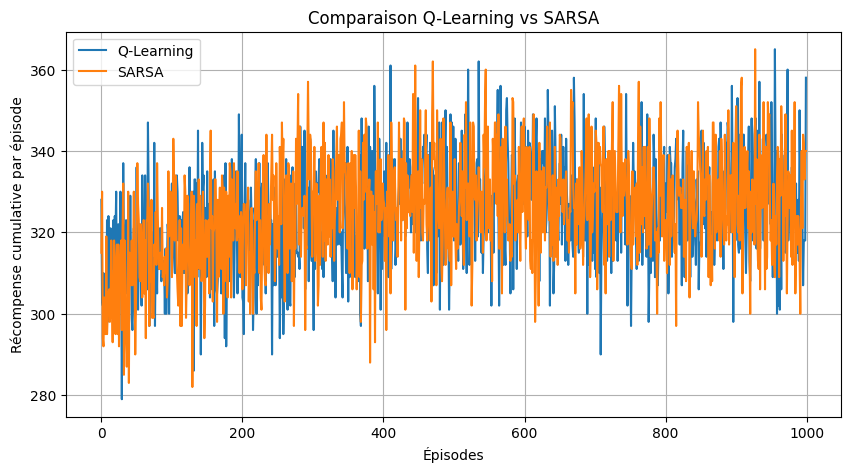

In [48]:
env = TrafficEnvironment()

# Entraînement
q_table, q_learning_rewards = train_q_learning(env, episodes=1000)
q_sarsa, sarsa_rewards = train_sarsa(env, episodes=1000)

# Affichage graphique
plt.figure(figsize=(10, 5))
plt.plot(q_learning_rewards, label="Q-Learning")
plt.plot(sarsa_rewards, label="SARSA")
plt.xlabel("Épisodes")
plt.ylabel("Récompense cumulative par épisode")
plt.title("Comparaison Q-Learning vs SARSA")
plt.legend()
plt.grid()
plt.show()
